<a id='Constructors Analysis'></a>

# Formula One World Championship 1950-2020 

#### To fast forward to Analysis and Visualisation [click here](#the_destination)

In [12]:
import os
for dirname, _, filenames in os.walk('Users/Vignesh/Desktop/Kaggle'):
    for filename in filenames:
        print(os.path.join('Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020','formula-1-world-championship-1950-2020'))

import sqlite3
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
input_files=os.listdir('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020')

In [13]:
conn = sqlite3.connect("f1_info.db")

In [14]:
engine = create_engine("sqlite:///f1_info.db")

In [15]:
def preprocess_cat_cols(df):
    cat_col=df.select_dtypes(include='object').columns
    for col in cat_col:
        for val in df[col].tolist():
            try:
                if '\\N' in val:
                    df[col].replace({'\\N':'nan'}, inplace=True)
                    break
            except:
                print('Column:',col,'Value:',val)
        df[col].str.strip()
        
        
def duplicate_index(df):
    dup=df.duplicated()
    indices=dup[dup==True].index
    return indices

In [16]:
ckt=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('circuits.csv')])
#Column alt has nothing but '\N' so we drop that column
preprocess_cat_cols(ckt)
print(ckt.head())
ckt.to_sql('circuit', con=engine, if_exists='replace')

   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

In [18]:
constr=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('constructors.csv')])
preprocess_cat_cols(constr)
print(constr.head())
constr.to_sql('constructors', con=engine, if_exists='replace')

   constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   
4              5     toro_rosso  Toro Rosso     Italian   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...  
4   http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso  


In [20]:
constr_rsl=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('constructor_results.csv')])
preprocess_cat_cols(constr_rsl)
print(constr_rsl.head())
constr_rsl.to_sql('constructor_results', con=engine, if_exists='replace')

   constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0    nan
1                     2      18              2     8.0    nan
2                     3      18              3     9.0    nan
3                     4      18              4     5.0    nan
4                     5      18              5     2.0    nan


In [21]:
constr_std=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('constructor_standings.csv')])
preprocess_cat_cols(constr_std)
print(constr_std)
constr_std.to_sql('constr_std', con=engine, if_exists='replace')

       constructorStandingsId  raceId  constructorId  points  position  \
0                           1      18              1    14.0         1   
1                           2      18              2     8.0         3   
2                           3      18              3     9.0         2   
3                           4      18              4     5.0         4   
4                           5      18              5     2.0         5   
...                       ...     ...            ...     ...       ...   
12531                   27728    1055            117     5.0         7   
12532                   27729    1055             51     0.0         8   
12533                   27730    1055            214    15.0         5   
12534                   27731    1055              3     0.0         9   
12535                   27732    1055            210     0.0        10   

      positionText  wins  
0                1     1  
1                3     0  
2                2     0  
3  

In [22]:
drivers=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('drivers.csv')])

drivers['name']=drivers['forename']+' '+drivers['surname']
drivers.drop(['forename','surname'],axis=1,inplace=True)

preprocess_cat_cols(drivers)
print(drivers.head())
drivers.to_sql('drivers', con=engine, if_exists='replace')

   driverId   driverRef number code         dob nationality  \
0         1    hamilton     44  HAM  1985-01-07     British   
1         2    heidfeld    nan  HEI  1977-05-10      German   
2         3     rosberg      6  ROS  1985-06-27      German   
3         4      alonso     14  ALO  1981-07-29     Spanish   
4         5  kovalainen    nan  KOV  1981-10-19     Finnish   

                                              url               name  
0     http://en.wikipedia.org/wiki/Lewis_Hamilton     Lewis Hamilton  
1      http://en.wikipedia.org/wiki/Nick_Heidfeld      Nick Heidfeld  
2       http://en.wikipedia.org/wiki/Nico_Rosberg       Nico Rosberg  
3    http://en.wikipedia.org/wiki/Fernando_Alonso    Fernando Alonso  
4  http://en.wikipedia.org/wiki/Heikki_Kovalainen  Heikki Kovalainen  


In [23]:
drivers_std=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('driver_standings.csv')])
preprocess_cat_cols(drivers_std)
print(drivers_std)
drivers_std.to_sql('drivers_std', con=engine, if_exists='replace')

       driverStandingsId  raceId  driverId  points  position positionText  \
0                      1      18         1    10.0         1            1   
1                      2      18         2     8.0         2            2   
2                      3      18         3     6.0         3            3   
3                      4      18         4     5.0         4            4   
4                      5      18         5     4.0         5            5   
...                  ...     ...       ...     ...       ...          ...   
33020              70346    1055       854     0.0        18           18   
33021              70347    1055       842     8.0        10           10   
33022              70348    1055       849     0.0        19           19   
33023              70349    1055         4     5.0        12           12   
33024              70350    1055       853     0.0        20           20   

       wins  
0         1  
1         0  
2         0  
3         0  
4    

In [24]:
lap_time=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('lap_times.csv')])
preprocess_cat_cols(lap_time)
print(lap_time.head())
lap_time.to_sql('lap_time', con=engine, if_exists='replace')

   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342


In [25]:
pit_stops=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('pit_stops.csv')])
preprocess_cat_cols(pit_stops)
print(pit_stops.head())
pit_stops.to_sql('pit_stops', con=engine, if_exists='replace')

   raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842


In [27]:
quali=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('qualifying.csv')])
preprocess_cat_cols(quali)
print(quali.head())
quali.to_sql('quali', con=engine, if_exists='replace')

   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18         9              2       4         2  1:26.103   
2          3      18         5              1      23         3  1:25.664   
3          4      18        13              6       2         4  1:25.994   
4          5      18         2              2       3         5  1:25.960   

         q2        q3  
0  1:25.187  1:26.714  
1  1:25.315  1:26.869  
2  1:25.452  1:27.079  
3  1:25.691  1:27.178  
4  1:25.518  1:27.236  


In [28]:
races=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('races.csv')])
preprocess_cat_cols(races)
print(races)
races.to_sql('races', con=engine, if_exists='replace')

      raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1053    1069  2021     18         69  United States Grand Prix  2021-10-24   
1054    1070  2021     19         32    Mexico City Grand Prix  2021-10-31   
1055    1071  2021     20         18      Brazilian Grand Prix  2021-11-07   
1056    1072  2021     22         77  Saudi Arabian Grand Prix  2021-12-05   
1057    1073  2021     23         24      Abu Dhabi Grand Prix  2021-12-12   

          time                                                u

In [29]:
results=pd.read_csv('/Users/Vignesh/Desktop/Kaggle/formula-1-world-championship-1950-2020/'+input_files[input_files.index('results.csv')])
results.position.replace({'\\N':1000},inplace=True)
results['position']=results.position.astype('int32').tolist()
grouped=results.groupby(by='raceId')['position']
values=grouped.transform(lambda x: len(x))
indices_to_replace=results[results.position==1000].index.tolist()
values_to_replace=values[indices_to_replace]
results['position'].iloc[indices_to_replace]=values_to_replace

preprocess_cat_cols(results)
print(results.head())
results.to_sql('results', con=engine, if_exists='replace')

   resultId  raceId  driverId  constructorId number  grid  position  \
0         1      18         1              1     22     1         1   
1         2      18         2              2      3     5         2   
2         3      18         3              3      7     7         3   
3         4      18         4              4      5    11         4   
4         5      18         5              1     23     3         5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41

In [30]:
query="""
        select name,r.constructorId,count(raceId) wins from constructors c
        join results r on c.constructorId=r.constructorId
        where r.position=1
        group by r.constructorId
        order by wins desc
"""

<a id='the_destination'></a>

# Constructor's Analysis


To begin this analysis of the constructors, we will do a disclaimer. Due to the fact that there is a lot of constructor, we will only concentrate our presentation on the most famous and the most well known such as Ferrari, McLaren, Mercedes and such.

As we can see, Ferrari is the constructor with the most races wons in all the history of the modern f1

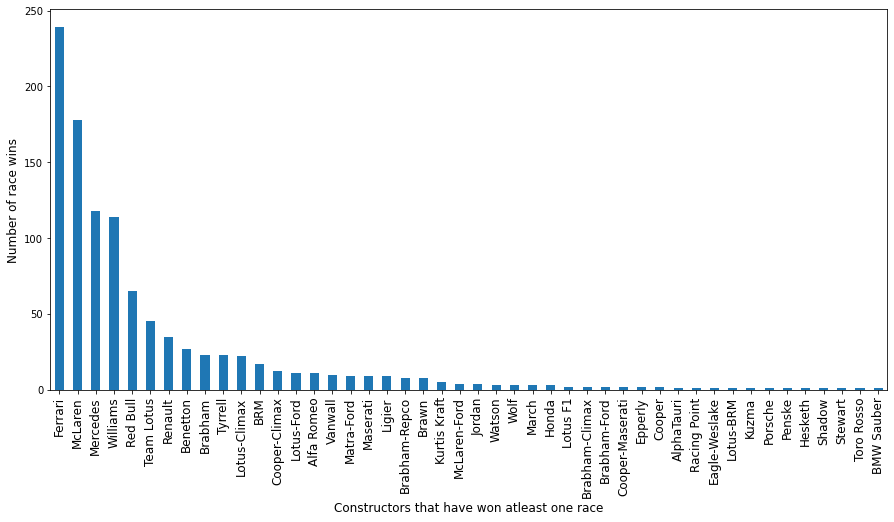

In [31]:
team_race_wins=pd.read_sql_query(query,conn).copy()
fig,ax=plt.subplots(figsize=(15,7))
ax=team_race_wins.wins.plot.bar(x='name',y='wins', color='tab:blue')
ax.set_xticks(range(team_race_wins.shape[0]))
ax.set_xticklabels(team_race_wins.name, fontsize=12)
plt.xlabel('Constructors that have won atleast one race', fontsize=12)
plt.ylabel('Number of race wins', fontsize=12);

In [32]:
query="""
    select ssq.year, cs.name, max(ssq.total_pts) win_pts from
    (select sq.constructorId, sq.year, sum(sq.pts) total_pts from
    (select rs.constructorId,r.year,sum(rs.points) pts from results rs
    join races r on rs.raceId=r.raceId
    group by rs.raceId, rs.constructorId) sq
    group by sq.constructorId,sq.year) ssq
    join constructors cs
    on ssq.constructorId=cs.constructorId
    group by ssq.year
"""

Consequently, Ferrari has also won most of the constructor's championship with almost 25 wins.

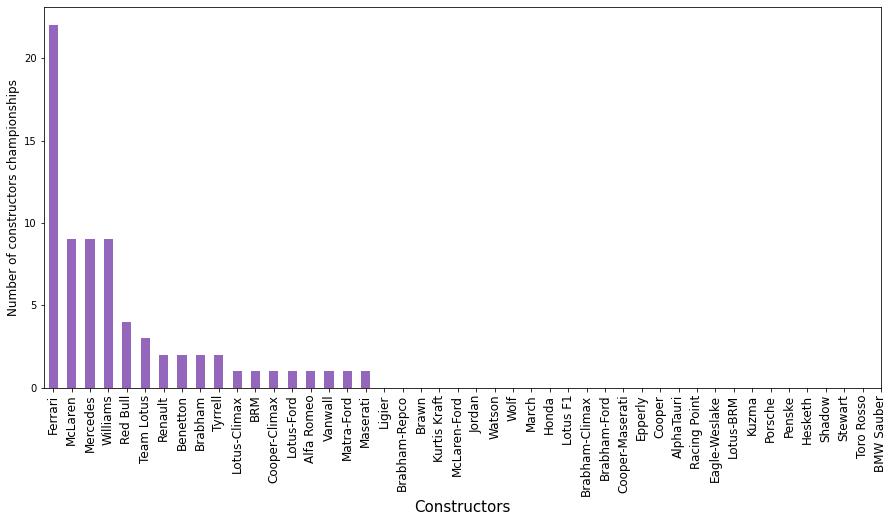

In [33]:
q=pd.read_sql_query(query,conn)
constr_champs_by_year=q.copy()

constr_champs_by_team=constr_champs_by_year.name.value_counts()

fig,ax=plt.subplots(figsize=(15,7))
ax=constr_champs_by_team.plot.bar(color='tab:purple')
ax.set_xticks(range(team_race_wins.shape[0]))
ax.set_xticklabels(team_race_wins.name, fontsize=12)
plt.ylabel('Number of constructors championships', fontsize=12)
plt.xlabel('Constructors', fontsize=15);

In [34]:
query="""
    select cs.name, driver_champs from
    (select sqq.constructorId, count(sqq.constructorId) driver_champs from
    (select sq.year, sq.driverId, sq.constructorId, max(pts) season_pts from
    (select rs.driverId, rs.constructorId, r.year, sum(rs.points) pts from results rs
    join races r on rs.raceId=r.raceId
    group by rs.driverId, r.year) sq
    group by sq.year) sqq
    group by sqq.constructorId) sqqq join
    constructors cs on sqqq.constructorId=cs.constructorId
    order by driver_champs desc
"""

But as we can see on the driver's championship wins, Ferrari don't have this much of a difference with the second most decorated constructor which is McLaren.

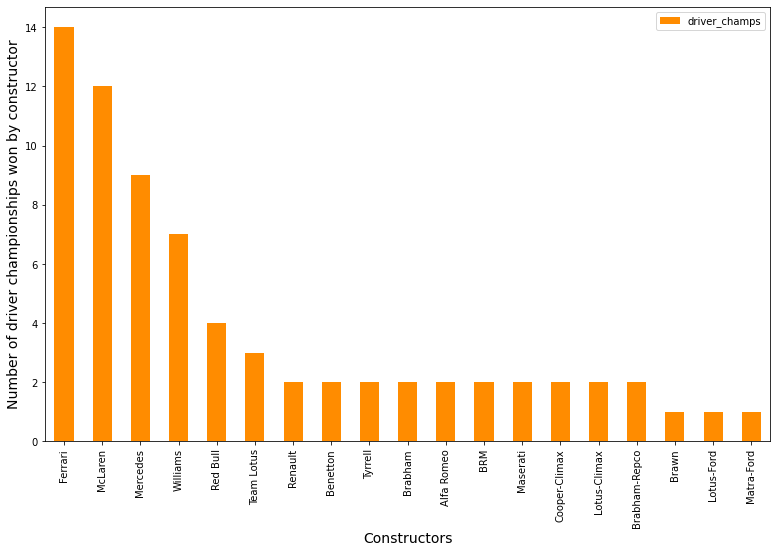

In [35]:
q=pd.read_sql_query(query,conn)
driver_champs_by_team=q.copy()

fig,ax=plt.subplots(figsize=(13,8))
driver_champs_by_team.plot.bar(x='name',y='driver_champs',ax=ax, color='darkorange')
ax.set_xlabel('Constructors',fontsize=14)
ax.set_ylabel('Number of driver championships won by constructor',fontsize=14);

In [36]:
query="""
    select sssq.name, sq2.num_seasons ,sssq.num_champ from
    (select ssq.name, count(ssq.name) num_champ from
    (select sq.year, sq.name, max(sq.season_points) win_points from
    (select r.year, cs.name, sum(rs.points) season_points from results rs join
    races r on rs.raceId=r.raceId join
    constructors cs on rs.constructorId=cs.constructorId
    group by cs.name, r.year) sq
    group by sq.year) ssq
    group by ssq.name) sssq join 
    
    (select sq1.name, count(sq1.year) num_seasons from
    (select r.year, cs.name from results rs join
    races r on rs.raceId=r.raceId join
    constructors cs on rs.constructorId=cs.constructorId
    group by cs.name, r.year) sq1
    group by sq1.name) sq2
    
    on
    
    sssq.name=sq2.name
"""

But as we can see by comparing the number of seasons participated with the number of championship won, Ferrari is not on the podium this time. This can be explained by the fact that Ferrari is the only constructor that participated at every season since 1950.

We can also see with these percentages that Brawn is a quite unique constructor with his 100% win that can be explained by the fact that Brawn has only participated in one season.

We can also see that Mercedes is a rather effective constructor since they have participated in 12 seasons and have won 7 of them. They now have more than 50% percent chance of winning. They currently are the number one since 2014.

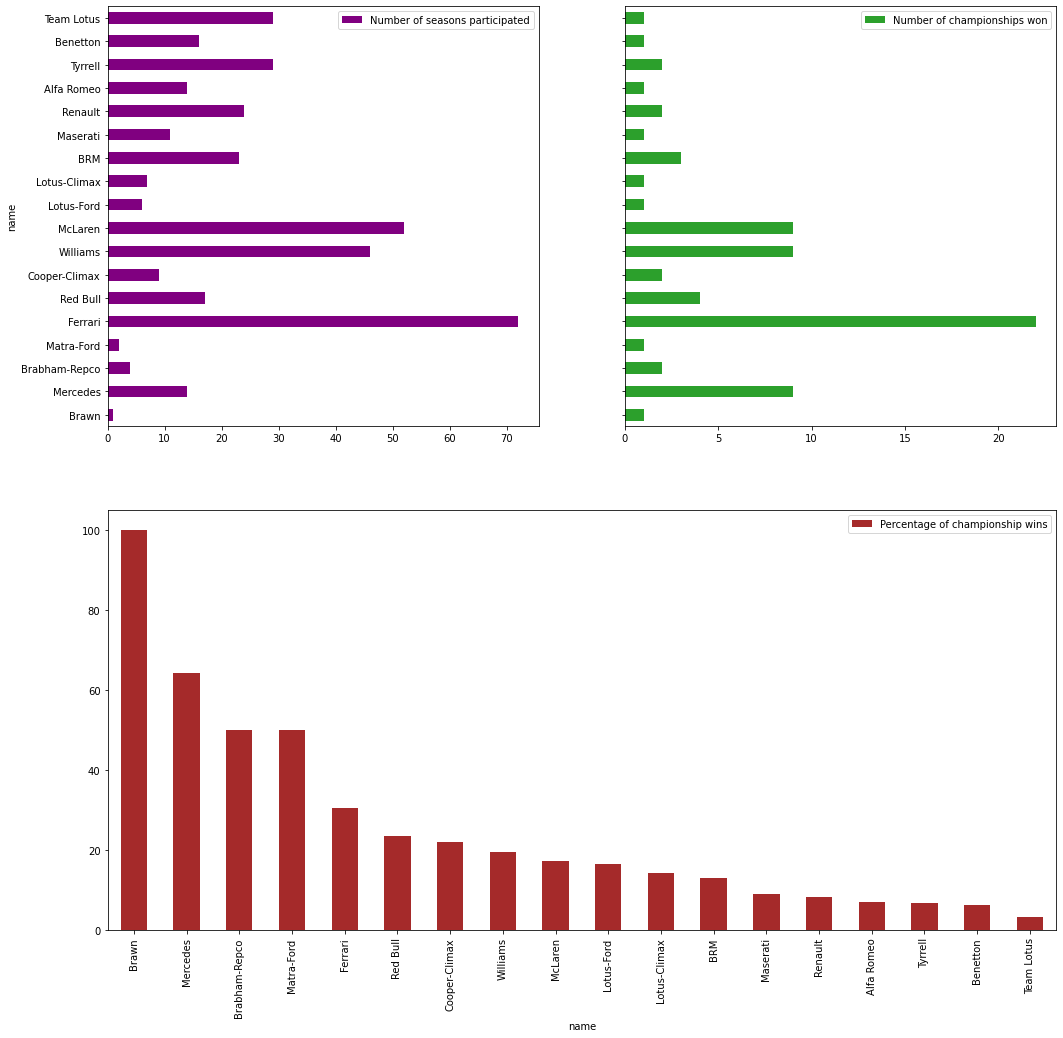

In [37]:
q=pd.read_sql_query(query,conn)
const_champs_seasons=q.copy()
const_champs_seasons['perc_season_champs']=round((const_champs_seasons['num_champ']/const_champs_seasons['num_seasons'])*100,2)
const_champs_seasons.sort_values(by=['perc_season_champs'],ascending=False,inplace=True)

fig=plt.figure(figsize=(17,17))
fig.tight_layout()

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)

const_champs_seasons.plot.barh(x='name',y='num_seasons',ax=ax1, color='purple' ,label='Number of seasons participated')
const_champs_seasons.plot.barh(x='name',y='num_champ',ax=ax2, sharey=ax1, color='tab:green' ,label='Number of championships won')
const_champs_seasons.plot.bar(x='name',y='perc_season_champs',ax=ax3, color='brown' ,label='Percentage of championship wins');

As we can see with this timeline, there is moment in the history of Ferrari when they have not been winning the constructor's title for a long period of time. In theses periods, other constructor gain their glory such as McLaren and Williams on the 1982-1998 period and Red Bull and Mercedes on the 2009-2020 period.

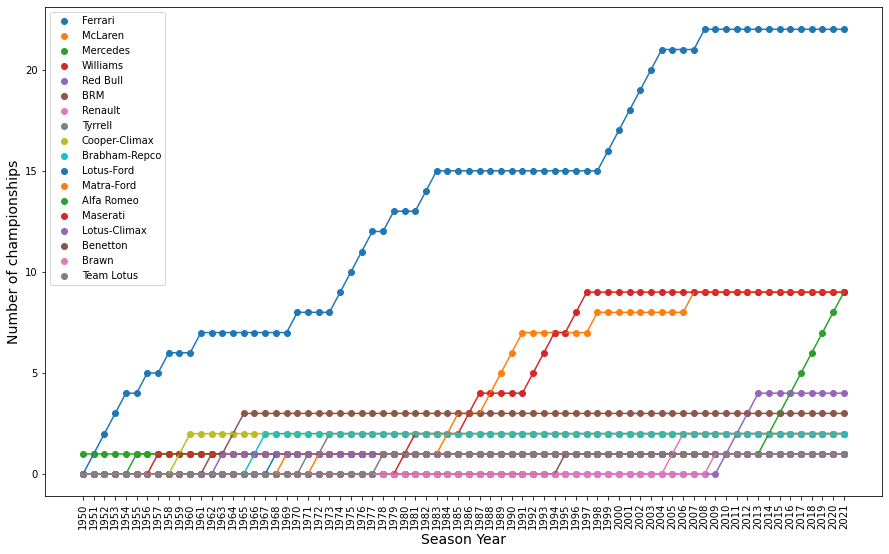

In [44]:
champ_teams=constr_champs_by_team.index
ohe_teams=pd.get_dummies(constr_champs_by_year.name)
champ_teams_by_year=dict()
for team in champ_teams:    
    champ_teams_by_year[team]=np.cumsum(ohe_teams[team])

fig,ax=plt.subplots(figsize=(15,9))
for team,performance in champ_teams_by_year.items():
    ax.plot(performance)
    ax.scatter(range(len(performance)),performance,label=team)
ax.set_ylabel('Number of championships', fontsize=14)
ax.set_xlabel('Season Year', fontsize=14)
ax.set_xticks(range(constr_champs_by_year.shape[0]))
ax.set_xticklabels(constr_champs_by_year.year.tolist(), rotation='vertical', fontsize=10)
plt.legend();

In [46]:
query="""
    select sqq.year, cs.name from
    (select sq.year, sq.driverId, sq.constructorId, max(pts) season_pts from
    (select rs.driverId, rs.constructorId, r.year, sum(rs.points) pts from results rs
    join races r on rs.raceId=r.raceId
    group by rs.driverId, r.year) sq
    group by sq.year) sqq join
    constructors cs on
    cs.constructorId=sqq.constructorId
    order by sqq.year
"""

Just as the timeline above, in the driver's championship too, Ferrari had periods of time when it's pilots weren't winning driver's title as well. The same other constructor's pilots have won their titles during theses periods.

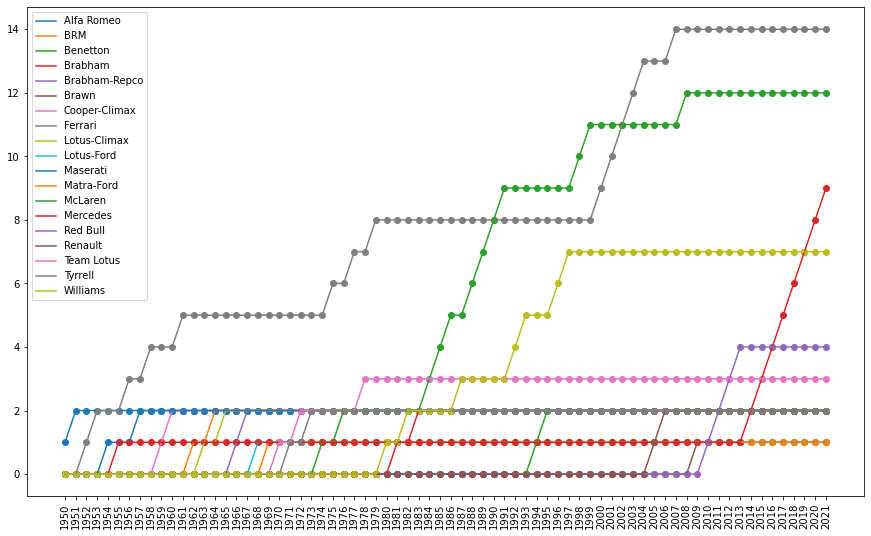

In [47]:
q=pd.read_sql_query(query,conn)
drivers_champs_by_team_yearly=q.copy()

champ_teams_for_drivers=drivers_champs_by_team_yearly.name.tolist()
ohe_champ_teams_for_drivers=pd.get_dummies(drivers_champs_by_team_yearly)
champ_teams_for_drivers=dict()
for team in ohe_champ_teams_for_drivers.columns[1:]:
    champ_teams_for_drivers[team.split('_')[1]]=np.cumsum(ohe_champ_teams_for_drivers[team])

fig,ax=plt.subplots(figsize=(15,9))
for team,driver_champs in champ_teams_for_drivers.items():
    ax.plot(driver_champs, label=team)
    ax.scatter(range(drivers_champs_by_team_yearly.shape[0]),driver_champs)
ax.set_xticks(range(drivers_champs_by_team_yearly.shape[0]))
ax.set_xticklabels(drivers_champs_by_team_yearly.year.tolist(), rotation='vertical', fontsize=10)
plt.legend();

In [58]:
query="""
    select sssq.name, sq2.num_seasons ,sssq.num_champ from
    (select ssq.name, count(ssq.name) num_champ from
    (select sq.year, sq.name, max(sq.season_points) win_points from
    (select r.year, dr.name, sum(rs.points) season_points from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    group by dr.name, r.year) sq
    group by sq.year) ssq
    group by ssq.name) sssq join 
    
    (select sq1.name, count(sq1.year) num_seasons from
    (select r.year, dr.name from results rs join
    races r on rs.raceId=r.raceId join
    drivers dr on rs.driverId=dr.driverId
    group by dr.name, r.year) sq1
    group by sq1.name) sq2
    
    on
    
    sssq.name=sq2.name
"""

# Drivers Analysis
As seen with this graph, winning a driver's championship is very difficult. We can see lots of big names in this plot, but not much are at more than 10% of winning a title in their entier F1 career.

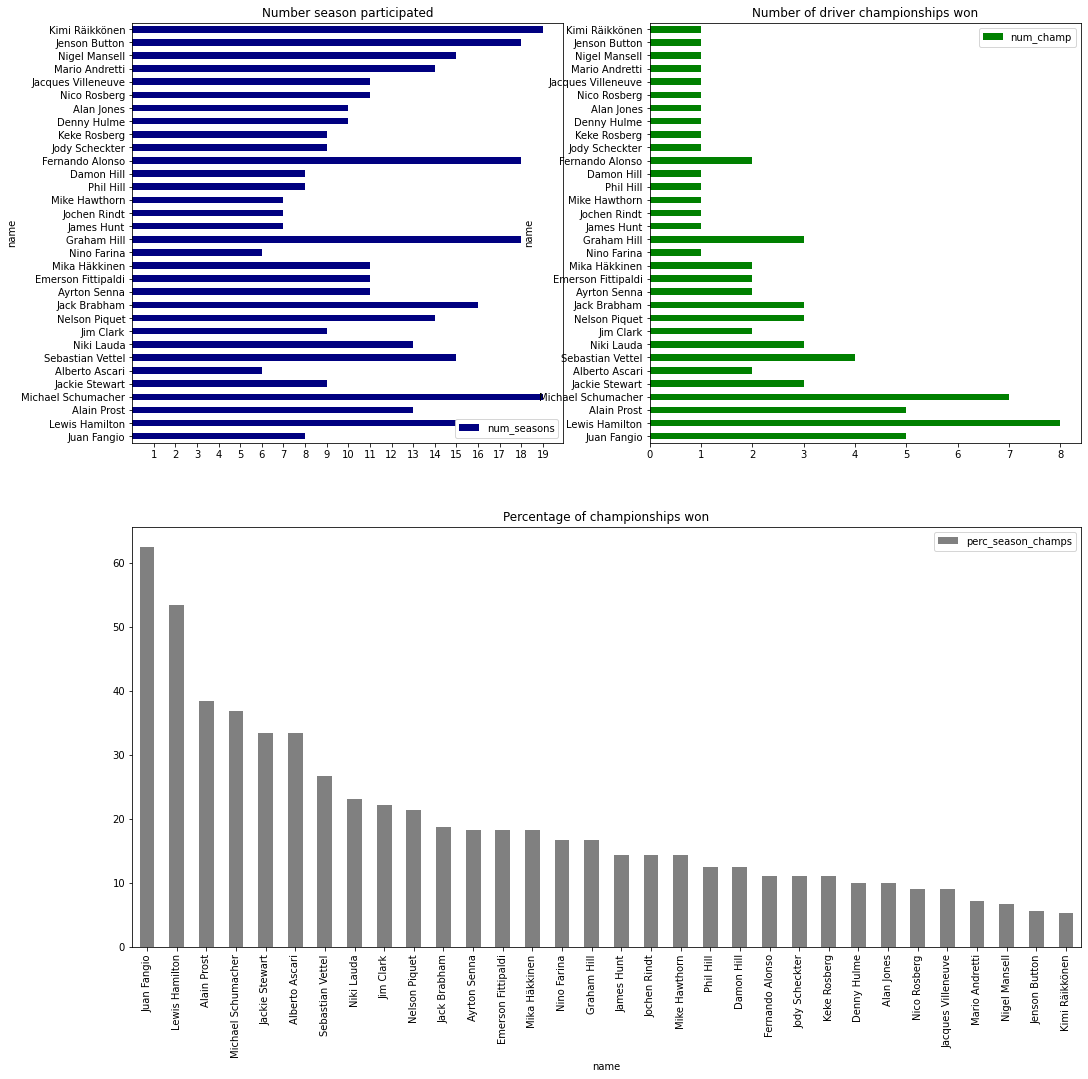

In [59]:
q=pd.read_sql_query(query,conn)
dr_champs_seasons=q.copy()
dr_champs_seasons['perc_season_champs']=round((dr_champs_seasons['num_champ']/dr_champs_seasons['num_seasons'])*100,2)
dr_champs_seasons.sort_values(by=['perc_season_champs'],ascending=False,inplace=True)

fig=plt.figure(figsize=(17,17))
fig.tight_layout()

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(212)

dr_champs_seasons.plot.barh(x='name',y='num_seasons',ax=ax1, color='navy')
ax1.set_xticks(range(1,max(dr_champs_seasons['num_seasons'])+1))
ax1.set_title('Number season participated')

dr_champs_seasons.plot.barh(x='name',y='num_champ',ax=ax2, color='green')
ax2.set_title('Number of driver championships won')

dr_champs_seasons.plot.bar(x='name',y='perc_season_champs',ax=ax3, color='gray')
ax3.set_title('Percentage of championships won');

In [50]:
query="""
    select sq.name, count(*) num_wins from
    (select dr.name from results rs join
    drivers dr on rs.driverId=dr.driverId
    where rs.position==1) sq
    group by sq.name
    order by num_wins desc limit(25)
"""

As we can see here, Lewis Hamilton has surpassed Michael Schumacher and taken his throne of greatest race winner.

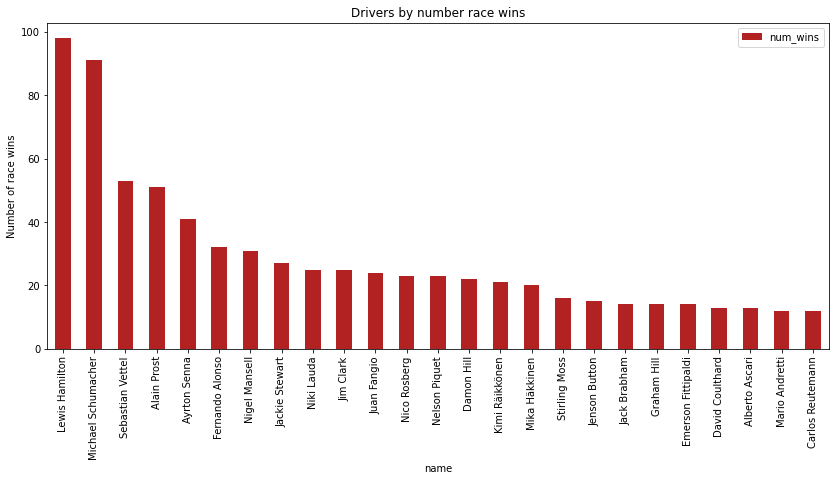

In [51]:
dr_race_wins=pd.read_sql_query(query,conn)
fig,ax=plt.subplots(figsize=(14,6))
dr_race_wins.plot.bar(x='name',y='num_wins',ax=ax, color='firebrick')
ax.set_title('Drivers by number race wins')
ax.set_ylabel('Number of race wins');

In [60]:
query="""
    select sq.name, count(*) num_pole_positions from
    (select dr.name from results rs join
    drivers dr on rs.driverId=dr.driverId
    where rs.grid==1) sq
    group by sq.name
    order by num_pole_positions desc limit(25)
"""

We can also see that most of the race winners were also in pole position.

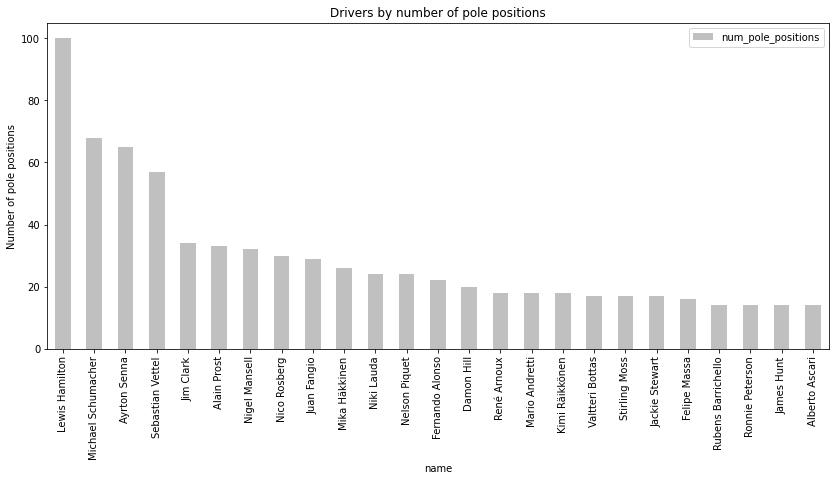

In [65]:
q=pd.read_sql_query(query,conn)
fig,ax=plt.subplots(figsize=(14,6))
q.plot.bar(x='name',y='num_pole_positions',ax=ax, color='silver')
ax.set_title('Drivers by number of pole positions')
ax.set_ylabel('Number of pole positions');